# Project 1: House Price Prediction

# Introduction:

*   In this project, you will use various features of houses to predict their estimated value.
*   You will perform exploratory data analysis, data preprocessing, and apply multiple regression models to find the best one.
*   Finally, you will evaluate the performance of your models using common regression metrics.

**Datasets Locations and Names:** Canvas -> Modules -> Week 6 -> Datasets -> "House_Sales_Dataset.csv".

Please save your Googgle Colab project as FirstName_LastName_Project1.ipynb and submit (upload) your source code to Canvas.

# Dataset Description:

* id: Unique ID for each house.
* estimated_value: The price the house is predicted to sell for (target variable).
* living_units: The number of bedrooms in the house.
* baths: The number of bathrooms in the house.
* interior_size: The interior living space size in square feet.
* lot_size: The size of the lot in square feet.
* num_floors: The number of floors in the house.
* has_waterfront: Whether the house has a waterfront view.
* scenic_view: Whether the house has a scenic view.
* house_condition: The overall condition of the house, with higher values indicating better condition.
* year_built: The year the house was built.

# Task 1: Exploratory Data Analysis (EDA)
* Visualize the distribution of the target variable (`estimated_value`).
* Create scatter plots or histograms to explore relationships between features like `living_units`, `baths`, `interior_size`, and `estimated_value`.
* Use a correlation heatmap to observe correlations between features and `estimated_value`.

> Below are scatter graphs of all the different variables with preprocessing done to them so that it makes a little more sense.

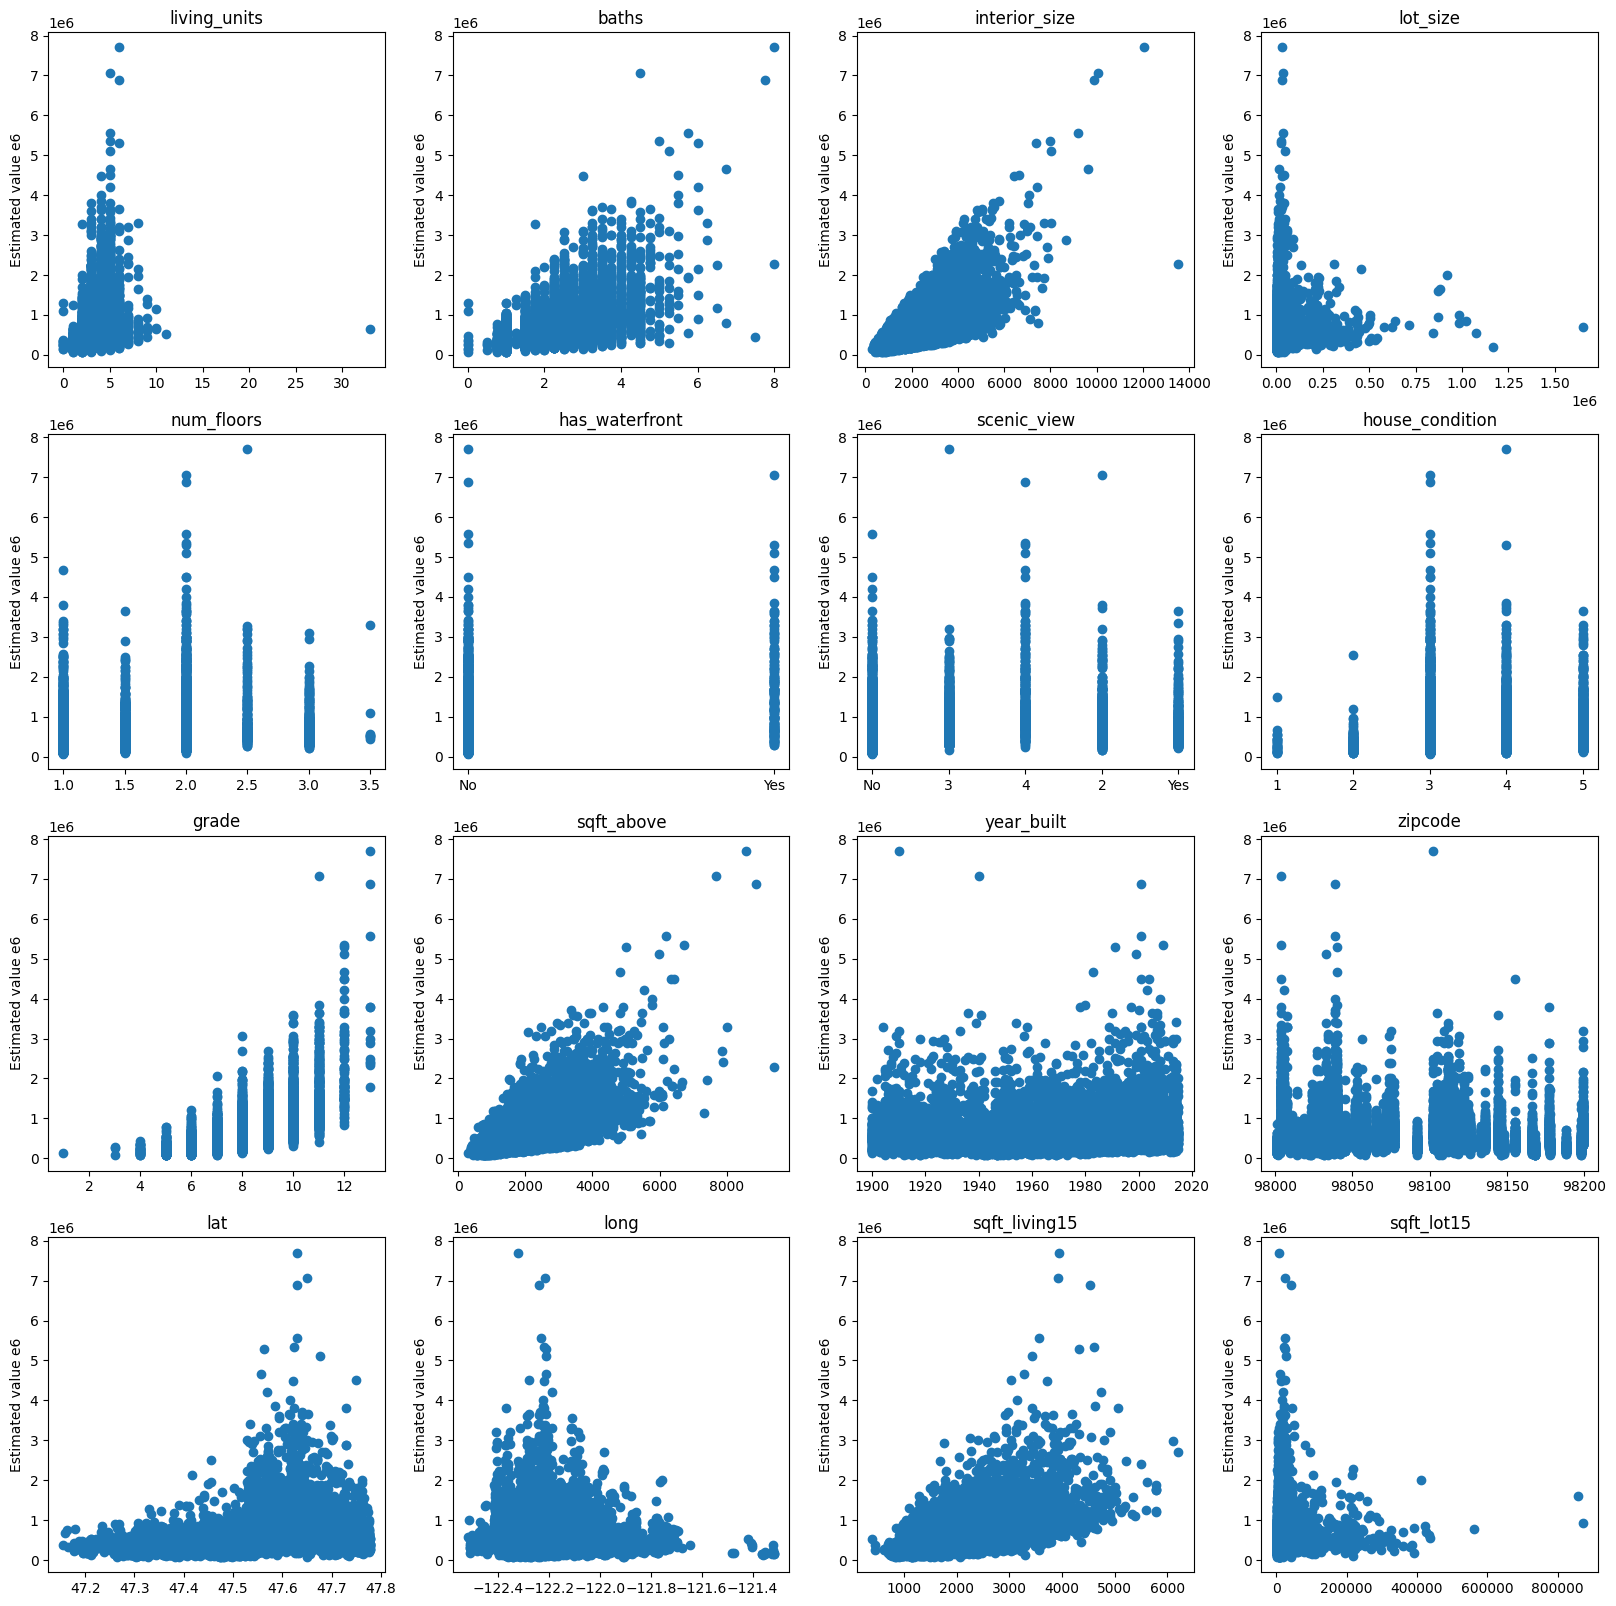

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(pd.read_csv('./House_Sales_Dataset.csv'))
#df["date"] = pd.to_datetime(df["date"], format='%Y%m%dT%H%M%S')

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
axes = axes.flatten()
for ax, column in zip(axes, df.columns[3:]):
    ax.scatter( x=df[column], y=df["estimated_value"])
    ax.set_ylabel("Estimated value e6")
    ax.set_title(column)

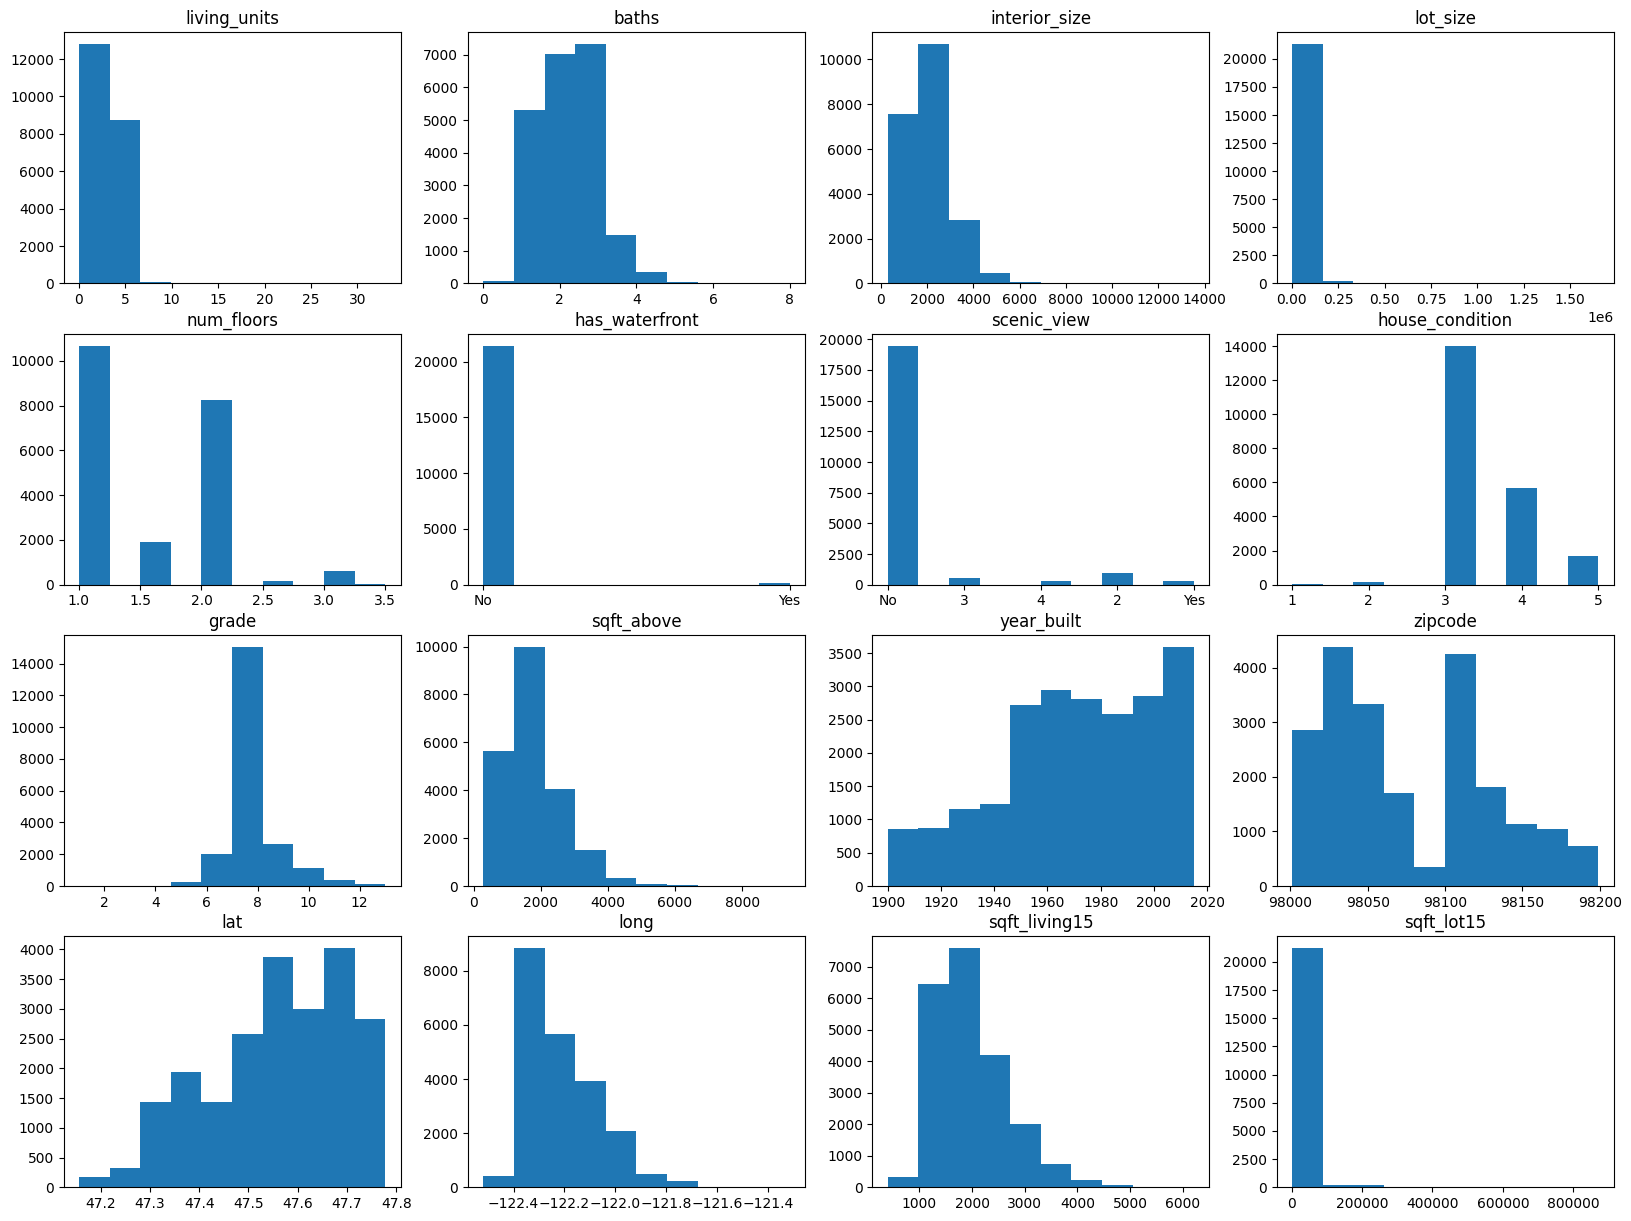

In [170]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20,15))
axes = axes.flatten()
for ax, column in zip(axes, df.columns[3:]):
    ax.hist( x=df[column])
    ax.set_title(column)

> Along with the heatmap of the correlation matrix, below is a ordered list of the correlations of the estimated value

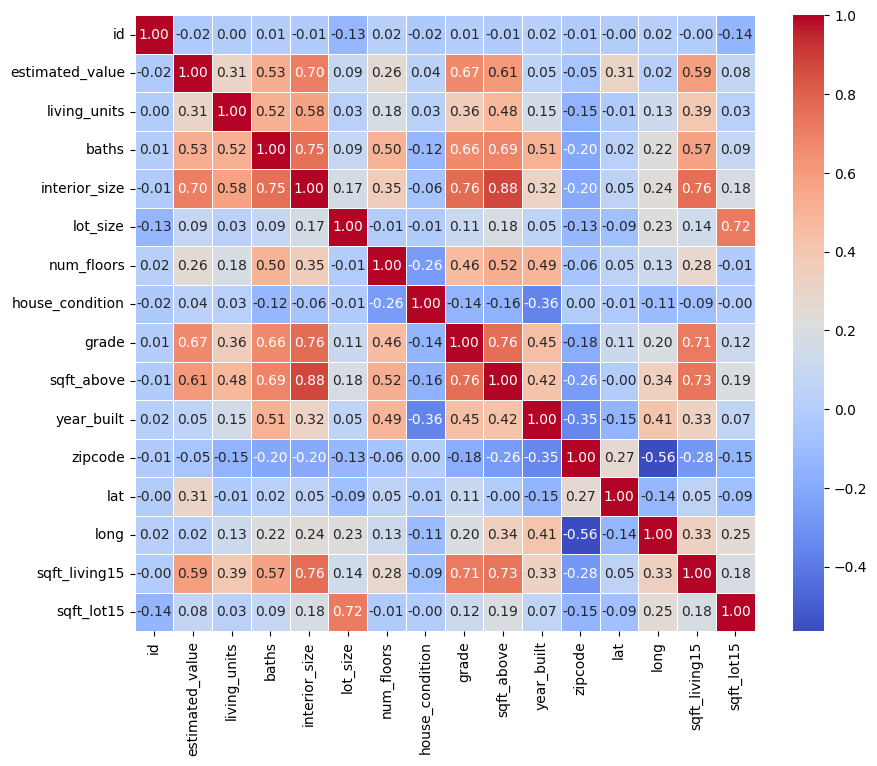

,estimated_value,Abs
estimated_value,1.000000,1.000000
interior_size,0.702035,0.702035
grade,0.667434,0.667434
sqft_above,0.605567,0.605567
sqft_living15,0.585379,0.585379
baths,0.525138,0.525138
living_units,0.308350,0.308350
lat,0.307003,0.307003
num_floors,0.256794,0.256794
lot_size,0.089661,0.089661


In [18]:
import seaborn as sns

plt.figure(figsize=(10,8))
corr_matrix = df.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.show()

estimated_corr = pd.DataFrame(corr_matrix[1:2]).T
estimated_corr["Abs"] = estimated_corr["estimated_value"].abs()
estimated_corr = estimated_corr.sort_values(by="Abs", ascending=False)
estimated_corr

> Below is a map of prices and density of the houses with more red being more expensive

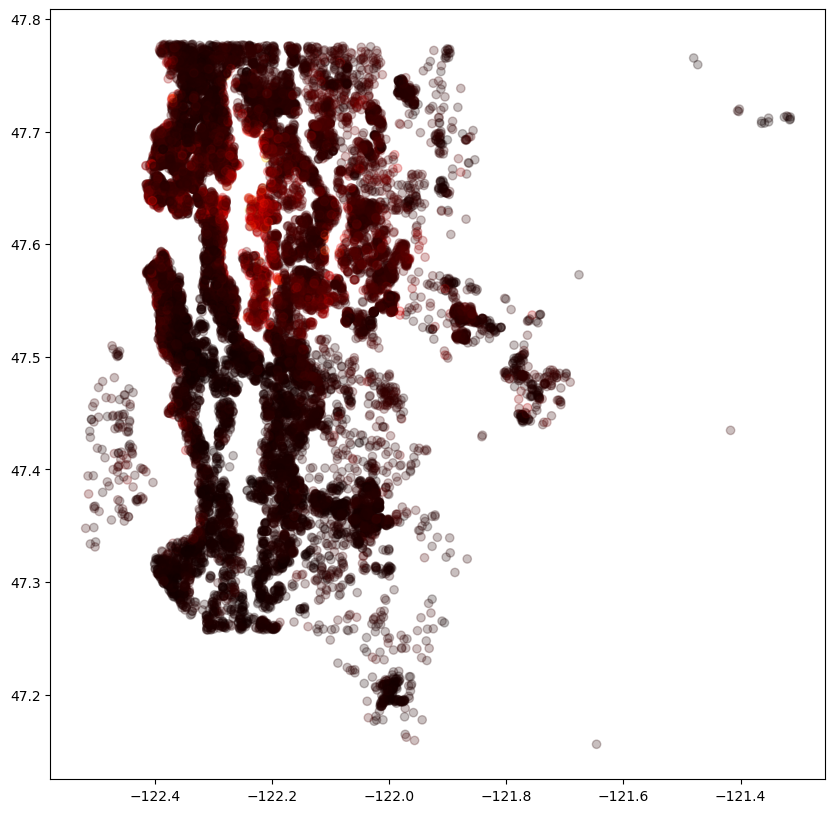

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(x=df["long"], y=df["lat"], alpha =0.25, cmap='hot', c=df["estimated_value"])

In [138]:
df

,id,date,estimated_value,living_units,baths,interior_size,lot_size,num_floors,has_waterfront,scenic_view,house_condition,grade,sqft_above,year_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,No,No,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,No,No,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,No,No,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,No,No,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,No,No,3,8,1680,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,No,No,3,8,1530,2009,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,No,No,3,8,2310,2014,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,No,No,3,7,1020,2009,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,No,No,3,8,1600,2004,98027,47.5345,-122.069,1410,1287


In [140]:
df.describe()

,id,estimated_value,living_units,baths,interior_size,lot_size,num_floors,house_condition,grade,sqft_above,year_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,7.656873,1788.390691,1971.005136,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.650743,1.175459,828.090978,29.373411,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1.000000,290.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Task 2: Data Preprocessing with Pipelines and Feature Extraction
* Use Pipeline for handling missing values, scaling, and feature extraction.
* Use ColumnTransformer for applying different transformations to numeric and categorical features.

> The pipelining with feature scaling and categorical preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np

numeric_preprocessor_std = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_preprocessor_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_preprocessor = Pipeline([
    ('imputer', SimpleImputer(fill_value='missing', strategy='constant')),
    ('onehot', OrdinalEncoder())
])

std_numerical_columns = list(df.select_dtypes(['float64', 'int64']).columns)
#Min maxing these columns because they have the most irregularity within the other groups
# Both num_floors and zip_code have two bumps and yearbuilt is uniform enough with teh estimated value and too skeewed in terms of data points towards newer houses
minmax_numerical_columns = ['num_floors', 'year_built', 'zipcode', 'id']
for col in minmax_numerical_columns:
    std_numerical_columns.remove(col)

std_numerical_columns.remove("estimated_value")

preprocessor = ColumnTransformer([
    ('categorical', categorical_preprocessor, ['has_waterfront', 'scenic_view']),
    ('numerical std', numeric_preprocessor_std, std_numerical_columns),
    ('numerical minmax', numeric_preprocessor_minmax, minmax_numerical_columns)
])

preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot', OrdinalEncoder())]),
                                 ['has_waterfront', 'scenic_view']),
                                ('numerical std',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['living_units', 'baths', 'interior_size',
                                  'lot_size', 'house_condition', 'grade',
                                  'sqft_above', 'lat', 'long', 'sqft_living15',
                                  'sqft_lot15']),
                                ('numerical minmax',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 ['num_floors', 'year_built', 'zipcode',
                                  'id'])])

> Below is the new dataframe that was processed using the pipelining

In [194]:
pd.DataFrame(preprocessor.fit_transform(df), columns=['has_waterfront', 'scenic_view'] + std_numerical_columns + minmax_numerical_columns).describe()

,has_waterfront,scenic_view,living_units,baths,interior_size,lot_size,house_condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,num_floors,year_built,zipcode,id
count,21613.000000,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.007542,2.819738,2.367051e-16,-1.788439e-16,2.419652e-16,1.052023e-17,-2.577456e-16,2.524855e-16,1.104624e-16,-3.432290e-14,-3.667614e-14,8.153176e-17,-2.893063e-17,0.197724,0.617436,0.388585,0.462602
std,0.086517,0.702172,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.215996,0.255421,0.270227,0.290592
min,0.000000,0.000000,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01,0.000000,0.443478,0.161616,0.214370
50%,0.000000,3.000000,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01,0.200000,0.652174,0.323232,0.394376
75%,0.000000,3.000000,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.075535e-01,2.919156e-01,5.091458e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02,0.400000,0.843478,0.590909,0.738246
max,1.000000,4.000000,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,2.444294e+00,4.545672e+00,9.204044e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01,1.000000,1.000000,1.000000,1.000000


# Task 3: Train Regression Models
Train at least 5 regression models within a pipeline:
* Linear Regression
* Decision Tree
* Random Forest
* Ridge Regression
* Lasso Regression

In [9]:
target = df.estimated_value
data = df.drop(columns= ["estimated_value"])

In [53]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

linear_regression = make_pipeline(preprocessor, LinearRegression())
decision_tree = make_pipeline(preprocessor, DecisionTreeRegressor())
random_forest = make_pipeline(preprocessor, RandomForestRegressor())
ridge_regression = make_pipeline(preprocessor, Ridge())
lasso_regression = make_pipeline(preprocessor, Lasso())


In [52]:
linear_regression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'interior_size', 'lot_size',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('linearregression', LinearRegression())])

In [54]:
decision_tree

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'interior_size', 'lot_size',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [55]:
random_forest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'interior_size', 'lot_size',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [56]:
ridge_regression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'interior_size', 'lot_size',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('ridge', Ridge())])

In [58]:
lasso_regression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'interior_size', 'lot_size',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('lasso', Lasso())])

# Task 4: Hyperparameter Tuning with GridSearchCV
* Apply GridSearchCV to at least one model for hyperparameter tuning.

In [67]:
from sklearn.model_selection import GridSearchCV
import numpy as np

#Doing the params with lasso as thats one of the three that underpreform
lasso_params = {
    'lasso__alpha': [0.1, 1.0, 10.0],
    'lasso__fit_intercept': [True, False],
    'lasso__max_iter': [1000, 2000, 5000],
    'lasso__selection': ['cyclic', 'random']
}

lasso_grid_search = GridSearchCV(
    lasso_regression,
    lasso_params,
    cv=5,
    n_jobs=-1
)

lasso_grid_search.fit(X_train, y_train)

lasso_best_params = lasso_grid_search.best_params_
lasso_best_score = lasso_grid_search.best_score_

print("Lasso best parameters:", lasso_best_params)
print("Lasso best score:", lasso_best_score)

Lasso best parameters: {'lasso__alpha': 0.1, 'lasso__fit_intercept': True, 'lasso__max_iter': 1000, 'lasso__selection': 'random'}
Lasso best score: 0.6931816198660882


In [51]:
#Testing out the Decision Tree because data was overfitting
tree_params = {
    'decisiontreeregressor__criterion': ['friedman_mse', 'squared_error'],
    'decisiontreeregressor__splitter': ['best', 'random'],
    'decisiontreeregressor__max_depth': [None, 10, 20, 30],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4],
    'decisiontreeregressor__max_features': ['sqrt', 'log2', None],
    'decisiontreeregressor__ccp_alpha': [0.0, 0.1, 0.2]
}

tree_grid_search = GridSearchCV(
    decision_tree,
    param_grid= tree_params,
    cv=5,
    n_jobs=-1
)

tree_grid_search.fit(X_train, y_train)

tree_best_params = tree_grid_search.best_params_
tree_best_score = tree_grid_search.best_score_

print("Tree best parameters:", tree_best_params)
print("Tree best score:",tree_best_score)

Tree best parameters: {'decisiontreeregressor__ccp_alpha': 0.0, 'decisiontreeregressor__criterion': 'friedman_mse', 'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_features': None, 'decisiontreeregressor__min_samples_leaf': 2, 'decisiontreeregressor__min_samples_split': 5, 'decisiontreeregressor__splitter': 'best'}
Tree best score: 0.7974799084192072


In [68]:
lasso_best_pipe = lasso_grid_search.best_estimator_
lasso_best_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'interior_size', 'lot_size',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('lasso', Lasso(alpha=0.1, selection='random'))])

In [65]:
tree_best_pipe = tree_grid_search.best_estimator_
tree_best_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OrdinalEncoder())]),
                                                  ['has_waterfront',
                                                   'scenic_view']),
                                                 ('numerical std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['living_units', 'baths',
                                                   'int...',
                                                   'house_condition', 'grade',
                                                   'sqft_above', 'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15']),
                                                 ('numerical minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['num_floors', 'year_built',
                                                   'zipcode', 'id'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                                       min_samples_leaf=2,
                                       min_samples_split=5))])

# Task 5: Model Evaluation
* Evaluate the performance of each model using RMSE, MAE, and R-squared.
* Compare the models and discuss which performed best and why.

In [71]:
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

pipes = [linear_regression, lasso_regression, lasso_best_pipe, decision_tree, tree_best_pipe, random_forest, ridge_regression]
column_name = ['Linear Regression', 'Lasso Regression', 'Lasso Optimized', 'Decision Tree', 'Decision Tree Optimized', 'Random Forest', 'Ridge Regression']
row_name = ['Training Error (MAE)', 'Test Error (MAE)', 'R2 score', 'RMSE score']

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
    p.fit(train_set, train_labels)
    train_preds = p.predict(train_set)
    test_preds = p.predict(test_set) 
    print("Training Error:\t" + str(mean_absolute_error(train_preds, train_labels)))
    print("Test Error:\t" + str(mean_absolute_error(test_preds, test_labels)))
    print("R2 score:\t" + str(r2_score(test_preds, test_labels)))
    print("RMSE score:\t" + str(root_mean_squared_error(test_preds, test_labels)))

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=column_name, index=row_name)

def fit_and_collect_metrics(p, train_set, train_labels, test_set, test_labels):
    p.fit(train_set, train_labels)
    train_preds = p.predict(train_set)
    test_preds = p.predict(test_set)

    metrics = {
        'Training Error (MAE)': mean_absolute_error(train_preds, train_labels),
        'Test Error (MAE)': mean_absolute_error(test_preds, test_labels),
        'R2 score': r2_score(test_preds, test_labels),
        'RMSE score': root_mean_squared_error(test_preds, test_labels)
    }
    
    return metrics

# Loop through the pipelines and collect metrics
for i, pipe in enumerate(pipes):
    metrics = fit_and_collect_metrics(pipe, X_train, y_train, X_test, y_test)
    for metric_name, value in metrics.items():
        results_df.at[metric_name, column_name[i]] = value

results_df


,Linear Regression,Lasso Regression,Lasso Optimized,Decision Tree,Decision Tree Optimized,Random Forest,Ridge Regression
Training Error (MAE),127337.70978,127337.012139,127337.640808,796.242337,70101.958034,26069.47223,127333.798309
Test Error (MAE),128195.047409,128194.559796,128194.999616,99728.314943,91831.624948,69487.351969,128189.104557
R2 score,0.53462,0.534602,0.534619,0.730303,0.733276,0.850485,0.534176
RMSE score,203784.553508,203784.960991,203784.594387,180835.005443,174006.126545,126964.770939,203794.233593


# Conclusion:
* Summarize your findings and explain any interesting insights from your analysis.

The data shows that the best data for the model is the Random forest even though it might be overfitted. The next two are the ones with the decision tree with the non-optimized one having overfitting issues.  
The suprising thing about the data is the similar r2 score for the both the models that were optimized versus their unoptimized counter parts. This could mean that the model was already doing good before the optmization. The good thing about the optimization though was that in Decision Tree model it removed the overfitting of data meaning that with new data it could predict with similar error.  
The similarity between the three models, linear, lasso, and ridge, could point to the fact that the models are linear based and the data was not fit for that. The other models that were not linear based preformed signifying a stronger conclusion that the data has a non linear relationship with the target values.  

Overall the data's relationship with the target label is one that is non-linear thus allowing for the models, decision tree and random forest, to get higher scores.